<a href="https://colab.research.google.com/github/SuhelAnsari9272/Topic-Modeling-on-News-Articles-/blob/main/Suhel_Topic_Modeling_on_News_Articles_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project your task is to identify major themes/topics across a collection of BBC news articles. You can use clustering algorithms such as Latent Dirichlet Allocation (LDA), Latent Semantic Analysis (LSA) etc.

## <b> Data Description </b>

### The dataset contains a set of news articles for each major segment consisting of business, entertainment, politics, sports and technology. You need to create an aggregate dataset of all the news articles and perform topic modeling on this dataset. Verify whether these topics correspond to the different tags available.

In [2]:
#importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import glob
import os
import re
import nltk
from nltk.tokenize import RegexpTokenizer

import warnings
warnings.filterwarnings("ignore")

from nltk.corpus import stopwords
nltk.download('stopwords')
import spacy
import gensim
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE
!pip install pyLDAvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 27.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=5a839285722a71bf560928efc710bbe2e44009efcbfc531bf7523593e831cf7e
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=281dc48a2ff196a48ad11db273538d8ed2553c033fac90fa7b19eb4fd4de404a
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable


In [3]:
#mouting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 

In [5]:
folder_list=os.listdir(path)
folder_list

['README.TXT', 'tech', 'sport', 'entertainment', 'business', 'politics']

In [6]:
#loading the data
News=[]
Type=[]

folder_data="/content/drive/MyDrive/bbc"
folders=["business","entertainment","politics","sport","tech"] 
for i in folders:
    files=os.listdir(path+'/'+i)
    for text_file in files:
        file_path=path + '/'+i+'/'+text_file
        with open(file_path,'rb') as f:
            data=f.read()
        News.append(data)
        Type.append(i)
      

In [7]:
data={'news':News,'type':Type}
df = pd.DataFrame(data)
df.to_csv('./bbc.csv')

In [8]:
df= pd.read_csv('bbc.csv')

In [9]:
df.head()

,Unnamed: 0,news,type
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  2225 non-null   int64 
 1   news        2225 non-null   object
 2   type        2225 non-null   object
dtypes: int64(1), object(2)
memory usage: 52.3+ KB


In [11]:
df.shape

(2225, 3)

In [12]:
#first observation 
df['news'][0]

'b"Peugeot deal boosts Mitsubishi\\n\\nStruggling Japanese car maker Mitsubishi Motors has struck a deal to supply French car maker Peugeot with 30,000 sports utility vehicles (SUV).\\n\\nThe two firms signed a Memorandum of Understanding, and say they expect to seal a final agreement by Spring 2005. The alliance comes as a badly-needed boost for loss-making Mitsubishi, after several profit warnings and poor sales. The SUVs will be built in Japan using Peugeot\'s diesel engines and sold mainly in the European market. Falling sales have left Mitsubishi Motors with underused capacity, and the production deal with Peugeot gives it a chance to utilise some of it.\\n\\nIn January, Mitsubishi Motors issued its third profits warning in nine months, and cut its sales forecasts for the year to March 2005. Its sales have slid 41% in the past year, catalysed by the revelation that the company had systematically been hiding records of faults and then secretly repairing vehicles. As a result, the J

In [13]:
#length of the news
df['length']=df.news.str.len()


In [14]:
#function to return number of words in news article
def wcount(article):

  # split the documents with different delimiter
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")
  
  # count the words
  count= len(tokenizer.tokenize(article))


  return count

<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<>:5: DeprecationWarning: invalid escape sequence \w
<ipython-input-14-0e556c29d257>:5: DeprecationWarning: invalid escape sequence \w
  tokenizer = RegexpTokenizer("\w+|\$[\d\.]+|\S+|\,'+|\'+|\-")


In [15]:
df['word_count']=df['news'].apply(wcount)

In [16]:
df.head()

,Unnamed: 0,news,type,length,word_count
0,0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business,1846,334
1,1,b'Call centre users \'lose patience\'\n\nCusto...,business,3882,730
2,2,b'China keeps tight rein on credit\n\nChina\'s...,business,1404,278
3,3,b'US trade gap hits record in 2004\n\nThe gap ...,business,1984,372
4,4,b'India\'s rupee hits five-year high\n\nIndia\...,business,1023,200


In [17]:
df.describe()

,Unnamed: 0,length,word_count
count,2225.000000,2225.000000,2225.000000
mean,1112.000000,2288.632809,426.946067
std,642.446496,1375.957963,262.611213
min,0.000000,512.000000,95.000000
25%,556.000000,1465.000000,273.000000
50%,1112.000000,1991.000000,369.000000
75%,1668.000000,2829.000000,523.000000
max,2224.000000,25670.000000,4888.000000


In [18]:
#Total number of words present in the whole corpus
sum(df['word_count'])

949955

In [19]:
#removing duplicates observations
df=df.drop_duplicates()

In [20]:
#Types of news in the data
df['type'].value_counts(normalize=True)*100

sport            22.966292
business         22.921348
politics         18.741573
tech             18.022472
entertainment    17.348315
Name: type, dtype: float64

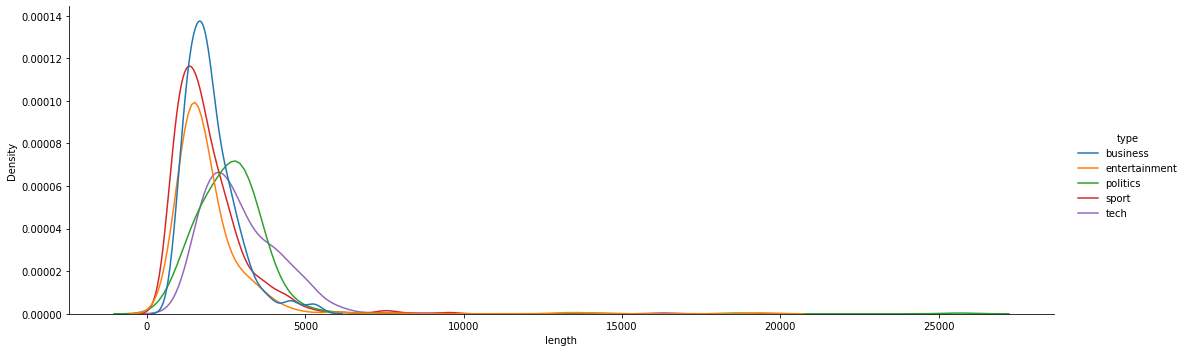

In [21]:
#distribution of length of different news type
sns.displot(df, x="length", hue="type", kind="kde",height=5,aspect =3 )

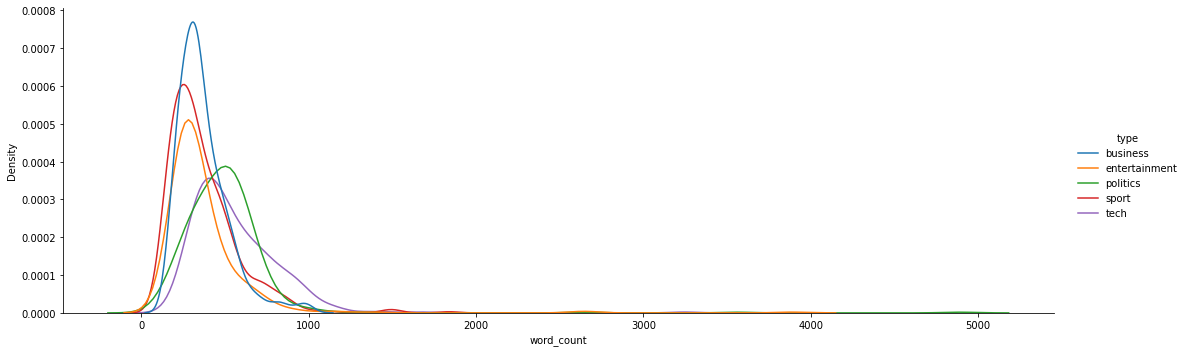

In [22]:
#distribution of length of different news type
sns.displot(df, x="word_count", hue="type", kind="kde",height=5,aspect =3 )

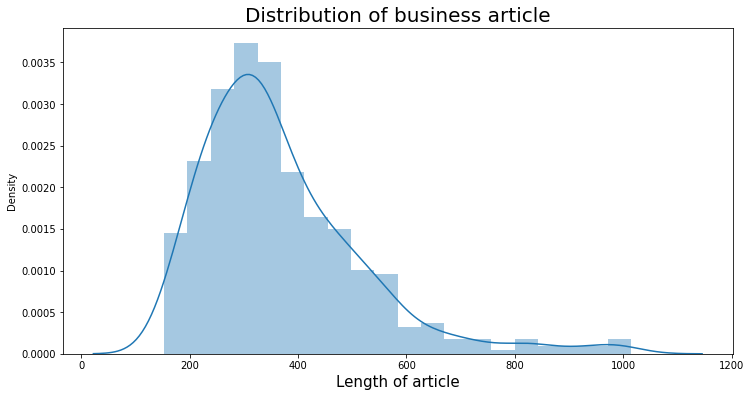

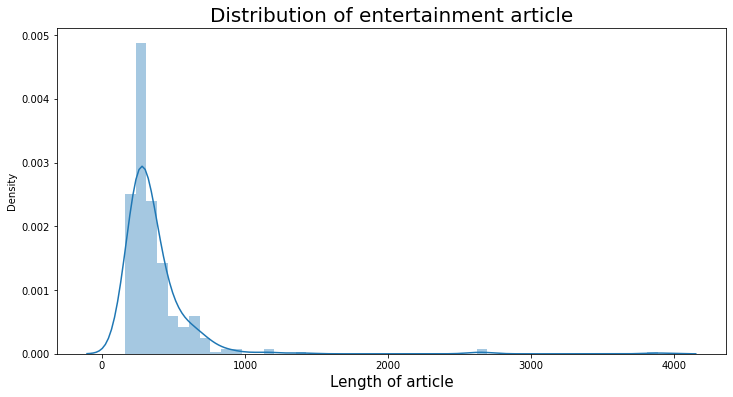

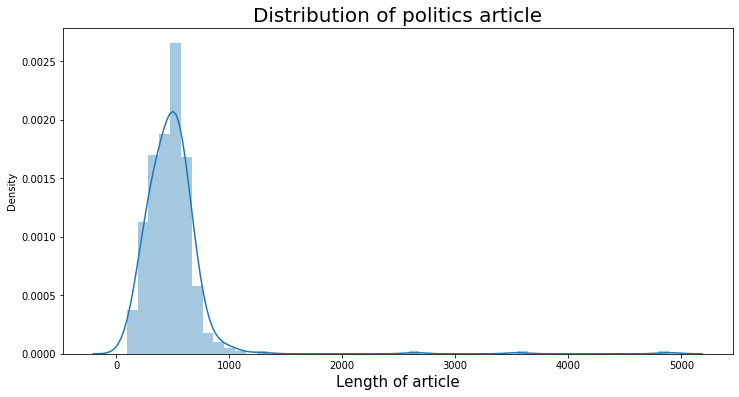

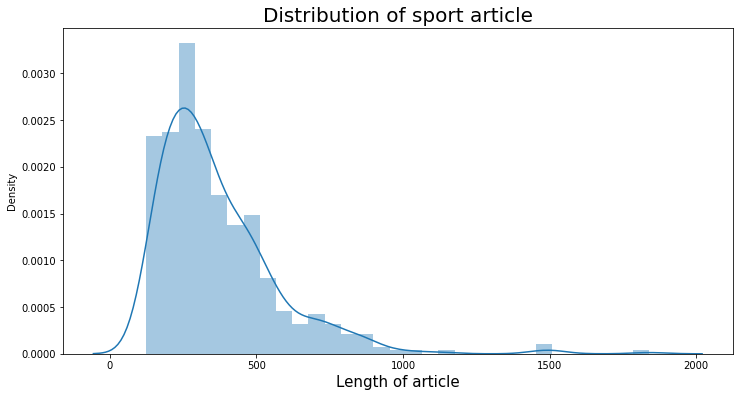

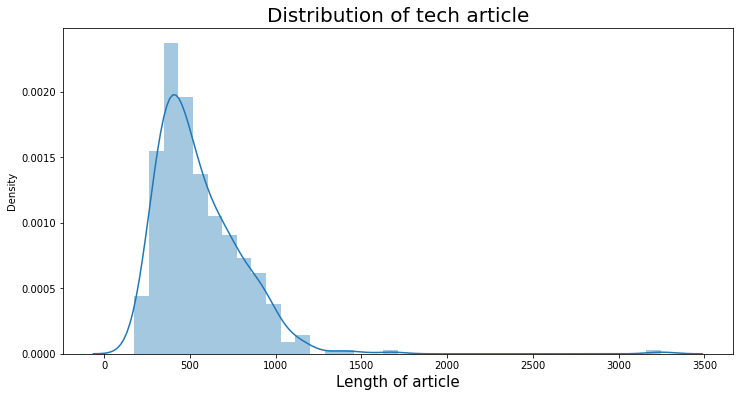

In [23]:
#Distribution of different types of articles
types_article=list(df['type'].unique())
for article in types_article:
  df_article=df[df['type']==article]
  plt.figure(figsize=(12,6))
  fig=sns.distplot(x=df_article['word_count'])
  fig.set_title(f'Distribution of {article} article',size=20)
  fig.set_xlabel('Length of article',size=15)

In [41]:
#copying the original data
corpus_df=df.copy(deep=True)

In [42]:
#any random observation
random_obs=df['news'][1786]
random_obs

'b\'Vickery upbeat about arm injury\\n\\nEngland prop Phil Vickery is staying positive despite a broken arm ruling him out of the RBS Six Nations.\\n\\nThe 28-year-old fractured the radius in his right forearm during Gloucester\\\'s 17-16 win over Bath on Saturday. He will undergo an operation on Monday and is expected to be out for at least six weeks. He said: "This isn\\\'t an injury that will stop me from working hard on the fitness elements and being around the lads." He added: "I\\\'ve got the operation this afternoon and I could be back doing fitness work after a week." "As frustrating as it is, I\\\'ve got to be positive."\\n\\nAfter the game, Vickery spoke with Bath prop David Barnes, who also broke his arm recently. "I had a chat with David Barnes and it looks like a similar injury to him," he said. "He said he had the operation and he was back running after a week. "There\\\'s no doubt that I\\\'m going to get involved and be around this place as soon as I can after the opera

* pucntuation, numericals , special characters, new line and additional spaces.

In [45]:
#Removal of newline character
random_obs=random_obs.replace('\\n'," ")

#Removal of all the punctuations,special character, numbers 
random_obs=re.sub("[^a-zA-Z]"," ",random_obs)

#conversion to lower case
random_obs=random_obs.lower()

#removal of additional whitespace
random_obs=re.sub(r'\s+'," ",random_obs)

#After basic cleaning
random_obs


'b vickery upbeat about arm injury england prop phil vickery is staying positive despite a broken arm ruling him out of the rbs six nations the year old fractured the radius in his right forearm during gloucester s win over bath on saturday he will undergo an operation on monday and is expected to be out for at least six weeks he said this isn t an injury that will stop me from working hard on the fitness elements and being around the lads he added i ve got the operation this afternoon and i could be back doing fitness work after a week as frustrating as it is i ve got to be positive after the game vickery spoke with bath prop david barnes who also broke his arm recently i had a chat with david barnes and it looks like a similar injury to him he said he said he had the operation and he was back running after a week there s no doubt that i m going to get involved and be around this place as soon as i can after the operation gloucester director of rugby nigel melville said phil has broke

In [106]:
#Stopwords
# list of stopwords from nltk
stopwords_nltk = list(stopwords.words('english'))

# list of stopwords from spacy
sp = spacy.load('en_core_web_sm')
stopwords_spacy = list(sp.Defaults.stop_words)

# list of stopwords from gensim
stopwords_gensim = list(gensim.parsing.preprocessing.STOPWORDS)

# unique stopwords from all stopwords
all_stopwords = []
all_stopwords.extend(stopwords_nltk)
all_stopwords.extend(stopwords_spacy)
all_stopwords.extend(stopwords_gensim)

# all unique stop words
all_stopwords = list(set(all_stopwords))

def stop_words(text):
  text = [wd.lower() for wd in text.split() if wd.lower() not in all_stopwords]
  return " ".join(text)

In [107]:
#removal of stopwords 
random_obs= stop_words(random_obs)
random_obs

'b vickery upbeat arm injury england prop phil vickery staying positive despite broken arm ruling rbs nations year old fractured radius right forearm gloucester win bath saturday undergo operation monday expected weeks said injury stop working hard fitness elements lads added got operation afternoon fitness work week frustrating got positive game vickery spoke bath prop david barnes broke arm recently chat david barnes looks like similar injury said said operation running week doubt going involved place soon operation gloucester director rugby nigel melville said phil broken radius large bone forearm know happened phil definitely action weeks feel sorry great shape needed minutes rugby weekend happened mentally hard'

In [114]:
#tokenization
def split_word(text):
  split = re.split("([A-Z][a-z]+[^A-Z]*)",text)
  return " ".join(split)

#random_obs= random_obs.split()  
#random_obs

In [115]:
random_obs= split_word(random_obs)
random_obs

'b vickery upbeat arm injury england prop phil vickery staying positive despite broken arm ruling rbs nations year old fractured radius right forearm gloucester win bath saturday undergo operation monday expected weeks said injury stop working hard fitness elements lads added got operation afternoon fitness work week frustrating got positive game vickery spoke bath prop david barnes broke arm recently chat david barnes looks like similar injury said said operation running week doubt going involved place soon operation gloucester director rugby nigel melville said phil broken radius large bone forearm know happened phil definitely action weeks feel sorry great shape needed minutes rugby weekend happened mentally hard'

'vickery upbeat arm injury england prop phil vickery staying positive despite broken arm ruling rbs nations year old fractured radius right forearm gloucester win bath saturday undergo operation monday expected weeks said injury stop working hard fitness elements lads added got operation afternoon fitness work week frustrating got positive game vickery spoke bath prop david barnes broke arm recently chat david barnes looks like similar injury said said operation running week doubt going involved place soon operation gloucester director rugby nigel melville said phil broken radius large bone forearm know happened phil definitely action weeks feel sorry great shape needed minutes rugby weekend happened mentally hard'

In [ ]:
#removal of parts of speech 


In [ ]:
#Function to perform cleaning or preprocessing of tweets
def cleaning(text):
  stemmer=PorterStemmer()
  cleaned_text = re.sub(r'@[\w]*','', text)     # removal of @users as they are don't impart much info 
  cleaned_text = re.sub('https?://\S+|www\.\S+', '', cleaned_text)    # removal of links
  cleaned_text = re.sub("[^a-zA-Z]"," ",cleaned_text)                 # removal of all the punctuations,special character, numbers
  
  cleaned_text = cleaned_text.lower()                                 # converting to lower case 
  
  cleaned_text = cleaned_text.split()                                 # tokenization
  
  cleaned_text = [stemmer.stem(word) for word in cleaned_text if not word  in stopwords.words("english")]  # word Stemming after removal of stopwords
  
  cleaned_text  = ' '.join(cleaned_text)                              # joining of tokenized words
  
  return cleaned_text

In [44]:
name='Md Suhel Ansari'
c=name.split(' ')
print(len(c))

3


TypeError: ignored

In [28]:
type(df['news'][2])

bytes

In [26]:
df.head()

,news,type
0,"b""Peugeot deal boosts Mitsubishi\n\nStruggling...",business
1,b'Call centre users \'lose patience\'\n\nCusto...,business
2,b'China keeps tight rein on credit\n\nChina\'s...,business
3,b'US trade gap hits record in 2004\n\nThe gap ...,business
4,b'India\'s rupee hits five-year high\n\nIndia\...,business


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   news    2225 non-null   object
 1   type    2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB
